## Summary

How to use *scipy's* [`scipy.stats.rv_discrete`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) class to model a discrete random variable.

This is a practical notebook rather than a theoretical one, and is intended to be a whistle-stop tour of `rv_discrete` using a non-trivial scenario.

The naming convention used to represent the different data structures is based on *SciPy's* various worked examples.

The scenario is based on *M343* Book 1, Example 2.2 (*Rolling two dice: independent random variables*).

In [1]:
import itertools as it
from collections import Counter
import pandas as pd
from scipy import stats as st
from seaborn import objects as so

In [2]:
%load_ext watermark
%watermark -iv

scipy  : 1.9.3
pandas : 1.5.1
seaborn: 0.12.1



Lower the precision of the output.

In [3]:
%precision 4

'%.4f'

### Define the event space and the probability of an event

To initialise an instance of `rv_discrete`, we requires the *event space* and the probability associated with each *event*.

Initialise 2 random variables, one to represent the red die and the other the blue die.

In [4]:
dice = [[roll+1 for roll in range(6)] for die in range(2)]

Get all possible outcomes from rolling the two dice by taking their caretesian product.

In [5]:
dice_rolls = [*it.product(*dice)]

Collect all the possible scores from rolling the two die.
(This our *event space*.)

In [6]:
scores = [sum(dice_roll) for dice_roll in dice_rolls]

Use a `Counter` to count the number of times each event occurs.

In [7]:
k_scores = Counter(scores)

Collect *xk*, the event space, and *pk*, the probability of each event.

In [8]:
xk = [*k_scores.keys()]
pk = [k_score / k_scores.total() for k_score in k_scores.values()]

### Initialise the random variable

Initialise *rv_score*, `rv_discrete`, a random variable that represents the score from rolling two die and summing the scores.

In [9]:
rv_score = st.rv_discrete(values=(xk, pk))

### Plot the random variable

Plot the p.m.f. and c.d.f.

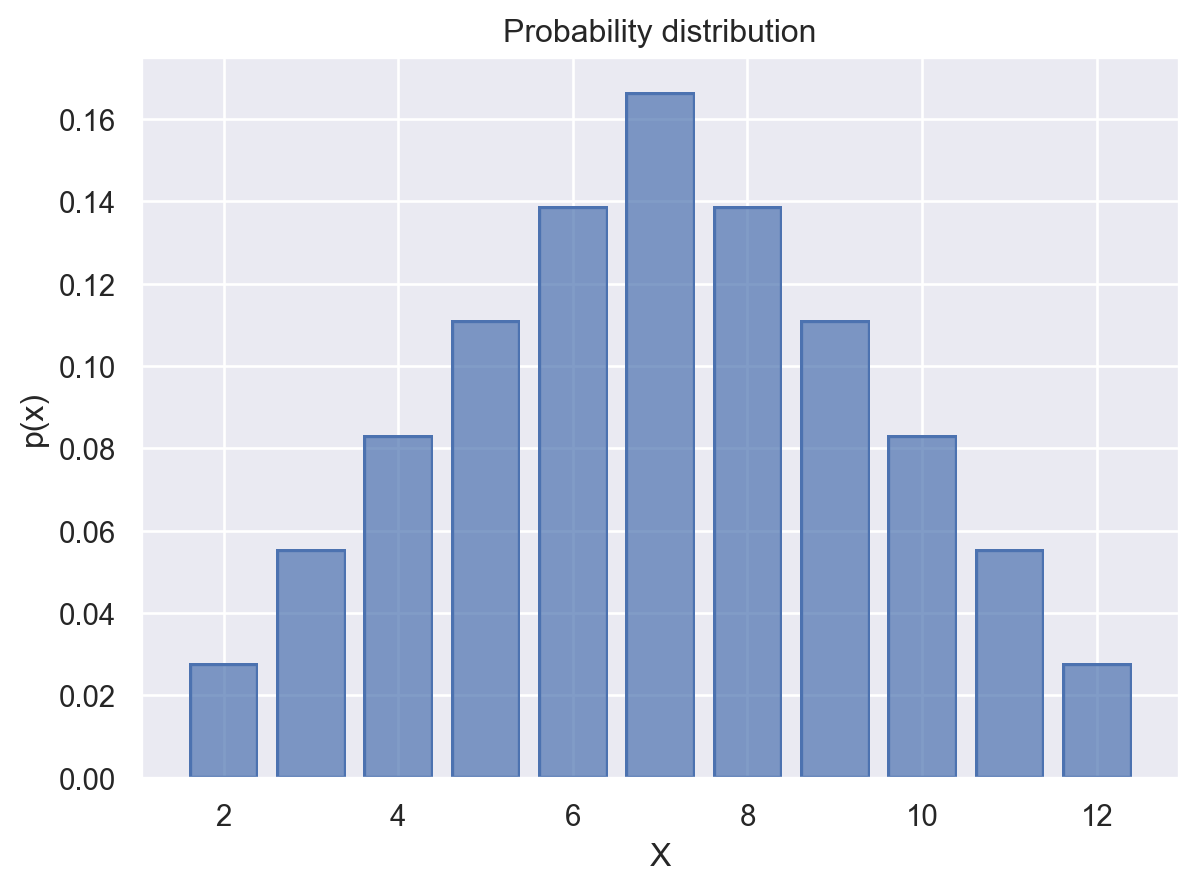

In [10]:
(
    so.Plot(x=xk,
            y=rv_score.pmf(xk))
    .add(so.Bar())
    .label(x='X',
           y='p(x)',
           title='Probability distribution')
)

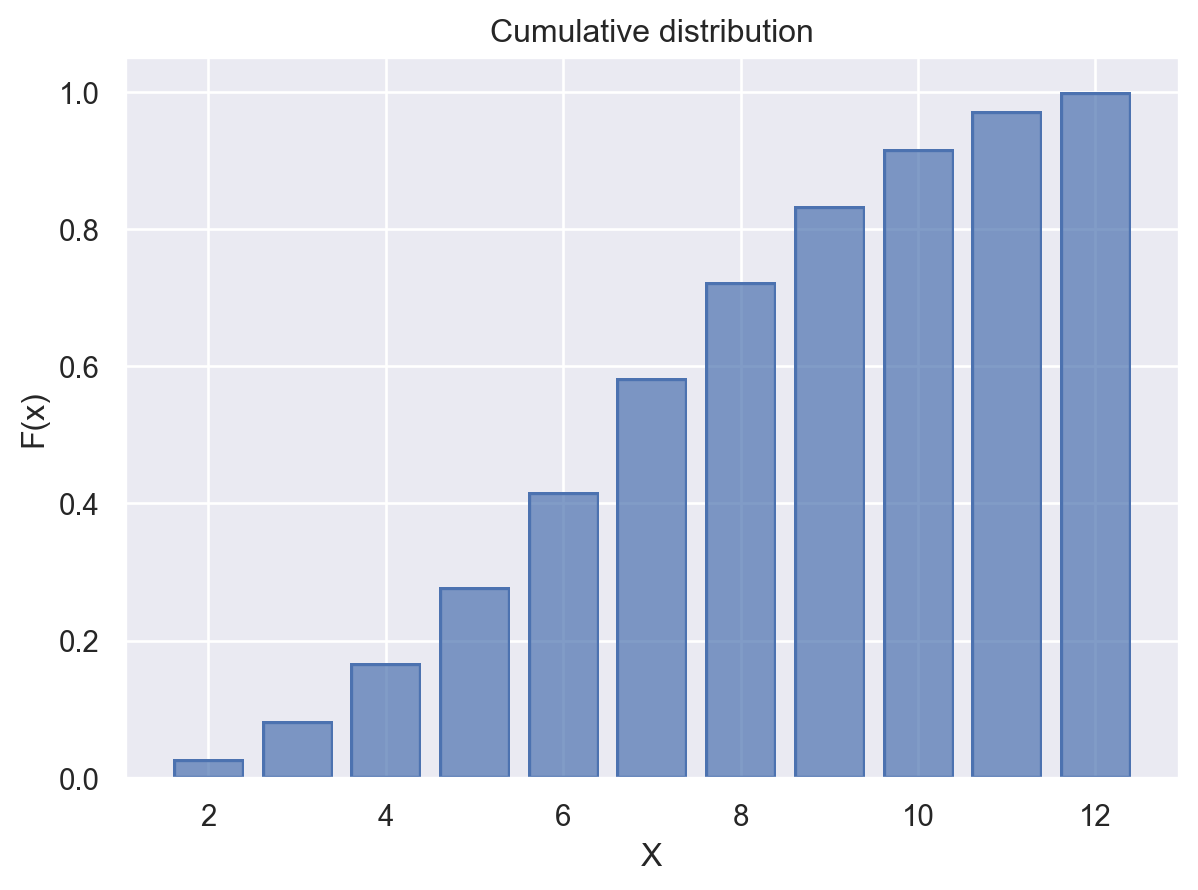

In [11]:
(
    so.Plot(x=xk, y=rv_score.cdf(xk))
    .add(so.Bar())
    .label(x='X',
           y='F(x)',
           title='Cumulative distribution')
)

### Calculating probabilities

Output a probability table.

In [12]:
(
    pd.DataFrame()
    .set_axis(pd.Index(xk, name='score'))
    .assign(pdf=rv_score.pmf(xk),
            cdf=rv_score.cdf(xk))
)

,pdf,cdf
score,,
2,0.027778,0.027778
3,0.055556,0.083333
4,0.083333,0.166667
5,0.111111,0.277778
6,0.138889,0.416667
7,0.166667,0.583333
8,0.138889,0.722222
9,0.111111,0.833333
10,0.083333,0.916667


**(a)**
Return the probability you roll snake eyes.

In [13]:
rv_score.pmf(2)

0.0278

**(b)**
Return the probability you roll 6 or less.

In [14]:
rv_score.cdf(6)

0.4167

**(c)**
Return the probability your score is 7 or greater.

In [15]:
rv_score.sf(6)  # P(X>=7) == P(X>6)

0.5833

### Location and spread

**(a)**
Return the mean, median, and modal score.

In [16]:
rv_score.mean(), rv_score.median(), st.mode(scores, keepdims=False).mode

(7.0000, 7.0000, 7)

**(b)**
Return the standard deviation, variance, and interquartile range.

In [17]:
def iqr(rv): return rv.ppf(0.75) - rv.ppf(0.25)


rv_score.std(), rv_score.var(), iqr(rv_score)

(2.4152, 5.8333, 4.0000)

### Calculating quantiles

**(a)**
Return the 0.1-quantile.

In [18]:
rv_score.ppf(0.1)

4.0000

**(b)**
Return the quartiles.

In [19]:
rv_score.ppf([0.25, 0.5, 0.75])

array([5., 7., 9.])

### Sampling the distribution

Generate a sample of scores.

In [20]:
rv_score.rvs(size=9)

array([11,  6,  5,  5,  5, 11,  4,  6,  5])

Plot a frequency distribution of a sample of size *n*=1000.

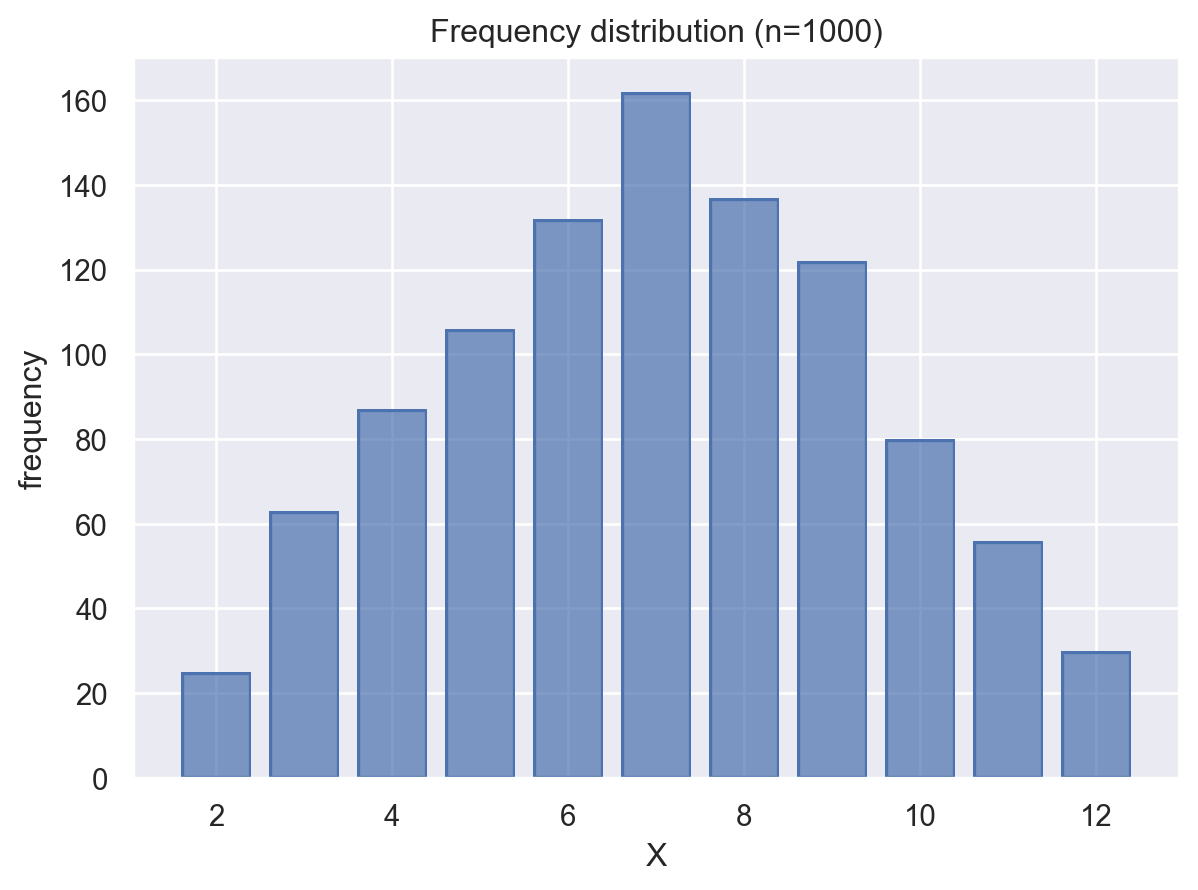

In [21]:
(
    so.Plot(x=rv_score.rvs(size=1000))
    .add(so.Bar(), so.Count())
    .label(x='X', y='frequency')
    .label(title='Frequency distribution (n=1000)')
)